In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("yRL172_pRL1007_vac.csv")
df

,date,strain,plasmid,name,number,how_many,count
0,101024,172,empty,172,1,1,17
1,101024,172,empty,172,1,2,24
2,101024,172,empty,172,1,3,5
3,101024,172,empty,172,1,4,4
4,101024,172,empty,172,1,1,17
...,...,...,...,...,...,...,...
104,101024,399,1007,1007,3,3,5
105,101024,399,1007,1007,3,4,1
106,101024,399,1007,1007,3,1,38
107,101024,399,1007,1007,3,2,18


In [3]:
df = df.drop('plasmid', axis=1)
df

,date,strain,name,number,how_many,count
0,101024,172,172,1,1,17
1,101024,172,172,1,2,24
2,101024,172,172,1,3,5
3,101024,172,172,1,4,4
4,101024,172,172,1,1,17
...,...,...,...,...,...,...
104,101024,399,1007,3,3,5
105,101024,399,1007,3,4,1
106,101024,399,1007,3,1,38
107,101024,399,1007,3,2,18


In [4]:
def vacuole_class(number):
    if number == 1:
        return 1
    elif number == 2:
        return 2
    elif number == 3:
        return 3
    else:
        return "3<"

In [5]:
df["vacuole_class"] = df["how_many"].apply(vacuole_class)
df

,date,strain,name,number,how_many,count,vacuole_class
0,101024,172,172,1,1,17,1
1,101024,172,172,1,2,24,2
2,101024,172,172,1,3,5,3
3,101024,172,172,1,4,4,3<
4,101024,172,172,1,1,17,1
...,...,...,...,...,...,...,...
104,101024,399,1007,3,3,5,3
105,101024,399,1007,3,4,1,3<
106,101024,399,1007,3,1,38,1
107,101024,399,1007,3,2,18,2


In [6]:
df_bar = df.groupby(["name", "number", "vacuole_class"], as_index=False).sum()
df_bar

,name,number,vacuole_class,date,strain,how_many,count
0,172,1,1,303072,516,3,54
1,172,1,2,303072,516,6,59
2,172,1,3,303072,516,9,19
3,172,1,3<,404096,688,17,9
4,172,2,1,202048,344,2,46
5,172,2,2,202048,344,4,44
6,172,2,3,202048,344,6,16
7,172,2,3<,505120,860,24,15
8,172,3,1,303072,516,3,44
9,172,3,2,303072,516,6,37


In [7]:
cell_count = df_bar.groupby(['name', 'number'], as_index=False)['count'].sum()
cell_count

,name,number,count
0,172,1,141
1,172,2,121
2,172,3,127
3,399,1,131
4,399,2,141
5,399,3,105
6,1007,1,146
7,1007,2,176
8,1007,3,163


In [8]:
cell_count = df_bar.groupby(['name', 'number'], as_index=False)['count'].sum()
cell_number = {}
names = df_bar["name"].unique().tolist()
cells_number_dict = {}
for name in names:
    cell_number[name] = {}
for _, row in cell_count.iterrows():
    cell_number[row["name"]][row["number"]] = row["count"]
cell_number

{172: {1: 141, 2: 121, 3: 127},
 399: {1: 131, 2: 141, 3: 105},
 1007: {1: 146, 2: 176, 3: 163}}

In [9]:
df_bar['percentage'] = df_bar.apply(lambda row: row["count"] * 100 / cell_number[row["name"]][row["number"]], axis=1)
df_bar

,name,number,vacuole_class,date,strain,how_many,count,percentage
0,172,1,1,303072,516,3,54,38.297872
1,172,1,2,303072,516,6,59,41.843972
2,172,1,3,303072,516,9,19,13.475177
3,172,1,3<,404096,688,17,9,6.382979
4,172,2,1,202048,344,2,46,38.016529
5,172,2,2,202048,344,4,44,36.363636
6,172,2,3,202048,344,6,16,13.223140
7,172,2,3<,505120,860,24,15,12.396694
8,172,3,1,303072,516,3,44,34.645669
9,172,3,2,303072,516,6,37,29.133858


In [10]:
df_mean = df_bar.groupby(['name', 'vacuole_class'], as_index=False).mean()


In [11]:
df_mean = df_mean[['name', 'vacuole_class', 'percentage']]
df_mean['sem'] = df_bar.groupby(['name', 'vacuole_class'], as_index=False).std()['percentage'] / np.sqrt(3)
df_mean

,name,vacuole_class,percentage,sem
0,172,1,36.986690,1.173325
1,172,2,35.780489,3.680661
2,172,3,15.461119,2.113213
3,172,3<,11.771702,2.947374
4,399,1,86.785514,1.604461
5,399,2,10.217613,1.386494
6,399,3,2.107499,0.111687
7,399,3<,0.889374,0.553456
8,1007,1,57.005809,3.774791
9,1007,2,32.793213,2.287771


In [12]:
df_mean_172 = df_mean[df_mean['name']==172]
df_mean_399 = df_mean[df_mean['name']==399]
df_mean_1007 = df_mean[df_mean['name']==1007]

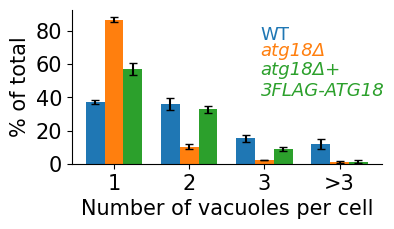

In [21]:
x = np.arange(df_mean['vacuole_class'].nunique())
distance = 0.25
width = 0.25
fontsize = 15
fig, ax = plt.subplots(figsize = (4, 2), dpi=100)
ax.bar(x=x, height="percentage", yerr="sem", data=df_mean_172, 
       width=width, capsize=3, ecolor='black')
ax.bar(x=x+distance, height="percentage", yerr="sem", data=df_mean_399, 
       width=width, capsize=3, ecolor='black')
ax.bar(x=x+2*distance, height="percentage", yerr="sem", data=df_mean_1007, 
       width=width, capsize=3, ecolor='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_xticks(x+distance)
ax.set_xticklabels(["1", "2", "3", ">3"], fontsize=fontsize)
ax.set_xlabel("Number of vacuoles per cell", fontsize=fontsize, loc="center")

ax.set_yticks([0, 20, 40, 60, 80])
ax.set_yticklabels(["0", "20", "40", "60", "80"], fontsize=fontsize)
ax.set_ylabel("% of total", fontsize=fontsize, loc="center")

y=75
ax.text(2.2, y, 'WT', ha='left', fontsize=fontsize-2, color='#1f77b4')
ax.text(2.2, y-10, 'atg18Δ', ha='left', fontsize=fontsize-2, color='#ff7f0e', fontstyle="italic")
ax.text(2.2, y-13, 'atg18Δ+\n3FLAG-ATG18', ha='left', va='top', fontsize=fontsize-2, color='#2ca02c', fontstyle="italic")

fig.savefig("pRL1007_vacuole_class.jpg", bbox_inches="tight")
plt.show()

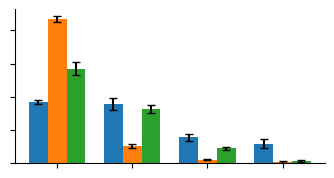

In [91]:
x = np.arange(df_mean['vacuole_class'].nunique())
distance = 0.25
width = 0.25
fig, ax = plt.subplots(figsize = (4, 2), dpi=100)
ax.bar(x=x, height="percentage", yerr="sem", data=df_mean_172, 
       width=width, capsize=3, ecolor='black')
ax.bar(x=x+distance, height="percentage", yerr="sem", data=df_mean_399, 
       width=width, capsize=3, ecolor='black')
ax.bar(x=x+2*distance, height="percentage", yerr="sem", data=df_mean_1007, 
       width=width, capsize=3, ecolor='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_xticks(x+distance)
ax.set_xticklabels(["", "", "", ""], fontsize=12)
ax.set_xlabel("", fontsize=13, loc="center")

ax.set_yticks([0, 20, 40, 60, 80])
ax.set_yticklabels(["", "", "", "", ""], fontsize=12)
ax.set_ylabel("", fontsize=13, loc="center")

fig.savefig("pRL1007_vacuole_class_notext.jpg", bbox_inches="tight")